In [1]:
import numpy as np
import pandas as pd

In [6]:
#load dataset
dataset = pd.read_csv('employee_data.csv')
print(dataset.describe())

             Age        Salary
count  14.000000      15.00000
mean   36.500000   63000.00000
std    12.296028   19574.03528
min    16.000000   38000.00000
25%    30.250000   50000.00000
50%    35.000000   56000.00000
75%    39.500000   75500.00000
max    69.000000  110000.00000


In [39]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values
print(x)
print(y)

[['Mumbai' 27.0 51000.0]
 ['NewYork' 27.0 48000.0]
 ['Mumbai' 30.0 52000.0]
 ['Singapore' 33.0 69000.0]
 ['NewYork' 40.0 79000.0]
 ['Singapore' 35.0 38000.0]
 ['Singapore' 35.0 72000.0]
 ['NewYork' 45.0 79000.0]
 ['Mumbai' 31.0 85000.0]
 ['Singapore' 37.0 49000.0]
 ['Mumbai' 69.0 110000.0]
 ['Tokyo' 16.0 40000.0]]
['Yes' 'Yes' 'No' 'No' 'Yes' 'No' 'No' 'Yes' 'Yes' 'No' 'No' 'Yes']


In [11]:
#drop missing value records
print(dataset.isnull().sum())

City                  0
Age                   0
Salary                0
Eligible for bonus    0
dtype: int64


In [9]:
dataset.dropna(inplace=True)

In [13]:
#replace missing values
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputer.fit(x[:,1:3])
x[:,1:3] = imputer.transform(x[:, 1:3])

In [14]:
#See the value of nan is getting replaced by the value of nan 
print(x)

[['Mumbai' 27.0 51000.0]
 ['NewYork' 27.0 48000.0]
 ['Mumbai' 30.0 52000.0]
 ['NewYork' 36.5 66000.0]
 ['Tokyo' 48.0 63000.0]
 ['Tokyo' 36.5 51000.0]
 ['Singapore' 33.0 69000.0]
 ['NewYork' 40.0 79000.0]
 ['Mumbai' 38.0 63000.0]
 ['Singapore' 35.0 38000.0]
 ['Tokyo' 36.5 56000.0]
 ['Singapore' 35.0 72000.0]
 ['NewYork' 45.0 79000.0]
 ['Mumbai' 31.0 85000.0]
 ['Singapore' 37.0 49000.0]
 ['Mumbai' 69.0 110000.0]
 ['Tokyo' 16.0 40000.0]]


In [26]:
#Data Encoding : Handle\Encode Categorical data
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [0])], remainder= "passthrough")
x = np.array(ct.fit_transform(x))
print(x)
                                      

[[1.0 0.0 0.0 0.0 27.0 51000.0]
 [0.0 1.0 0.0 0.0 27.0 48000.0]
 [1.0 0.0 0.0 0.0 30.0 52000.0]
 [0.0 1.0 0.0 0.0 36.5 66000.0]
 [0.0 0.0 0.0 1.0 48.0 63000.0]
 [0.0 0.0 0.0 1.0 36.5 51000.0]
 [0.0 0.0 1.0 0.0 33.0 69000.0]
 [0.0 1.0 0.0 0.0 40.0 79000.0]
 [1.0 0.0 0.0 0.0 38.0 63000.0]
 [0.0 0.0 1.0 0.0 35.0 38000.0]
 [0.0 0.0 0.0 1.0 36.5 56000.0]
 [0.0 0.0 1.0 0.0 35.0 72000.0]
 [0.0 1.0 0.0 0.0 45.0 79000.0]
 [1.0 0.0 0.0 0.0 31.0 85000.0]
 [0.0 0.0 1.0 0.0 37.0 49000.0]
 [1.0 0.0 0.0 0.0 69.0 110000.0]
 [0.0 0.0 0.0 1.0 16.0 40000.0]]


In [32]:
#Label Encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)
print(y)

[1 1 0 0 1 0 0 1 1 0 0 0 1 1 0 0 1]


In [34]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.25, random_state=1)
print(x_train)
print(x_test)
print(x_train)
print(y_test)

[[0.0 0.0 0.0 1.0 36.5 56000.0]
 [0.0 0.0 0.0 1.0 48.0 63000.0]
 [0.0 1.0 0.0 0.0 27.0 48000.0]
 [0.0 0.0 1.0 0.0 37.0 49000.0]
 [1.0 0.0 0.0 0.0 27.0 51000.0]
 [0.0 0.0 0.0 1.0 16.0 40000.0]
 [1.0 0.0 0.0 0.0 69.0 110000.0]
 [0.0 0.0 1.0 0.0 35.0 38000.0]
 [1.0 0.0 0.0 0.0 38.0 63000.0]
 [0.0 1.0 0.0 0.0 45.0 79000.0]
 [0.0 0.0 1.0 0.0 35.0 72000.0]
 [0.0 0.0 0.0 1.0 36.5 51000.0]]
[[0.0 1.0 0.0 0.0 36.5 66000.0]
 [1.0 0.0 0.0 0.0 31.0 85000.0]
 [0.0 1.0 0.0 0.0 40.0 79000.0]
 [1.0 0.0 0.0 0.0 30.0 52000.0]
 [0.0 0.0 1.0 0.0 33.0 69000.0]]
[[0.0 0.0 0.0 1.0 36.5 56000.0]
 [0.0 0.0 0.0 1.0 48.0 63000.0]
 [0.0 1.0 0.0 0.0 27.0 48000.0]
 [0.0 0.0 1.0 0.0 37.0 49000.0]
 [1.0 0.0 0.0 0.0 27.0 51000.0]
 [0.0 0.0 0.0 1.0 16.0 40000.0]
 [1.0 0.0 0.0 0.0 69.0 110000.0]
 [0.0 0.0 1.0 0.0 35.0 38000.0]
 [1.0 0.0 0.0 0.0 38.0 63000.0]
 [0.0 1.0 0.0 0.0 45.0 79000.0]
 [0.0 0.0 1.0 0.0 35.0 72000.0]
 [0.0 0.0 0.0 1.0 36.5 51000.0]]
[0 1 1 0 0]


In [35]:
#Feature Scaling - Statndardization & Normalization
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train[:,4:] = scaler.fit_transform(x_train[:,4:])
x_test[:,4:] = scaler.fit_transform(x_test[:,4:])
print(x_train)
print(x_test)


[[0.0 0.0 0.0 1.0 -0.08039761142244642 -0.2100902925755561]
 [0.0 0.0 0.0 1.0 0.8441749199356875 0.15756771943166706]
 [0.0 1.0 0.0 0.0 -0.8441749199356875 -0.6302708777266682]
 [0.0 0.0 1.0 0.0 -0.04019880571122321 -0.5777483045827793]
 [1.0 0.0 0.0 0.0 -0.8441749199356875 -0.4727031582950012]
 [0.0 0.0 0.0 1.0 -1.728548645582598 -1.0504514628777806]
 [1.0 0.0 0.0 0.0 2.532524759807062 2.6261286571944513]
 [0.0 0.0 1.0 0.0 -0.20099402855611606 -1.1554966091655585]
 [1.0 0.0 0.0 0.0 0.04019880571122321 0.15756771943166706]
 [0.0 1.0 0.0 0.0 0.6029820856683482 0.9979288897338915]
 [0.0 0.0 1.0 0.0 -0.20099402855611606 0.6302708777266682]
 [0.0 0.0 0.0 1.0 -0.08039761142244642 -0.4727031582950012]]
[[0.0 1.0 0.0 0.0 0.6498364332886585 -0.3692744729379982]
 [1.0 0.0 0.0 0.0 -0.839372059664518 1.3012529046386603]
 [0.0 1.0 0.0 0.0 1.5975145651679525 0.773717943298663]
 [1.0 0.0 0.0 0.0 -1.110137240201459 -1.6001893827313256]
 [0.0 0.0 1.0 0.0 -0.2978416985906357 -0.10550699226799949]]


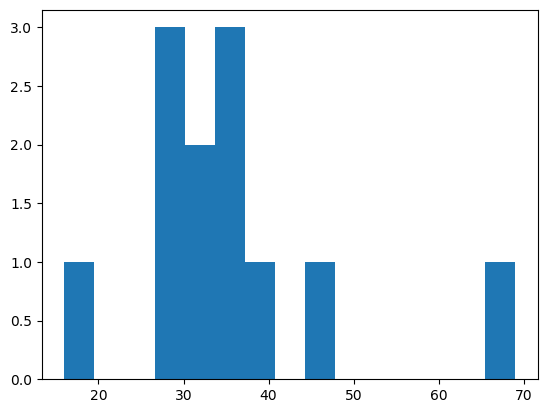

<class 'AttributeError'>: 'Series' object has no attribute 'quantil'

In [38]:
#Find and Remove Outliers
import matplotlib.pyplot as plt
plt.hist(dataset['Age'], bins = 15)
plt.show()

#Quantile
lowerLimit = dataset['Age'].quantil(0.05)
lowerLimit
dataset[dataset['Age'] > lowerLimit(0.95)]

upperlimit = dataset['Age'].quantile(0.95)
upperlimit
dataset[dataset['Age'] > upperLimit]
        
dataset[dataset['Age'] > lowerLimit & dataset['Age'] < upperLimit]
        

Convert Ordinal Data to Numeric Values

In [46]:
import pandas as pd
import numpy as np
Cricketers  = {'Name':['Virat','Rohit','Babar','Boult','Bumrah','Mujeeb','Nabi','Strokes'],
               'Age':[31, 33, 25, 31, 26, 19, 35, 29], 
               'Grade':['Best','Better','Good','Best','Better','Good','Best','Better'],
               'Role':['Batsman','Batsman','Batsman','Bowler','Bowler','All-Rounder','All-Rounder'],
               'Rating':[871,855,829,722,719,701,301,285],
               'Country':['IND', 'IND', 'PAK', 'NZ', 'IND', 'AFG', 'AFG', 'ENG']}

In [87]:
Cricketers = pd.DataFrame(Cricketers)
Cricketers

,Name,Age,Grade,Role,Rating,Country,GradeNum
0,Virat,31,Best,Batsman,871,IND,3
1,Rohit,33,Better,Batsman,855,IND,2
2,Babbar,25,Good,Batsman,829,PAK,1
3,Boult,31,Best,Bowler,722,NZ,3
4,Bumrah,26,Better,Bowler,719,IND,2
5,Mujeeb,19,Good,Bowler,701,AFG,1
6,Nabi,35,Best,All-Rounder,301,AFG,3
7,Strokes,29,Better,All-Rounder,285,ENG,2


In [75]:
dataMapping={
    "Best": 3, 
    "Better": 2, 
    "Good":1
}

In [79]:
Cricketers['GradeNum']=Cricketers['Grade'].map(dataMapping)
Cricketers  

,Name,Age,Grade,Role,Rating,Country,GradeNum
0,Virat,31,Best,Batsman,871,IND,3
1,Rohit,33,Better,Batsman,855,IND,2
2,Babbar,25,Good,Batsman,829,PAK,1
3,Boult,31,Best,Bowler,722,NZ,3
4,Bumrah,26,Better,Bowler,719,IND,2
5,Mujeeb,19,Good,Bowler,701,AFG,1
6,Nabi,35,Best,All-Rounder,301,AFG,3
7,Strokes,29,Better,All-Rounder,285,ENG,2


DATA BINNING

In [ ]:
#Continuous Variables to Data Binning

In [88]:
def binningFunction(col,cut_points,labels=None):
    minval = col.min()
    maxval = col.max
    break_points = [minval] + cut_points + [maxval]
    print(break_points)
    if not labels:
        labels = range(len(cut_points+1))
        colBin = pd.cut(col,bins=break_points,labels=labels,include_lowest = True)
    return colBin

In [89]:
cut_points = [25, 30];
labels = ['Young','Senior','SuperSenior']
Cricketers['Exp_category'] = binningFunction(Cricketers['Age'],cut_points,labels)
Cricketers

<class 'KeyError'>: 'Age'

In [91]:
columns=['Role']
dummyData = pd.get_dummies(Cricketers[columns])
dummyData

,Role_All-Rounder,Role_Batsman,Role_Bowler
0,0,1,0
1,0,1,0
2,0,1,0
3,0,0,1
4,0,0,1
5,0,0,1
6,1,0,0
7,1,0,0


In [93]:
Cricketers = pd.concat([Cricketers, dummyData], axis=1)
Cricketers

,Name,Age,Grade,Role,Rating,Country,GradeNum,Role_All-Rounder,Role_Batsman,Role_Bowler
0,Virat,31,Best,Batsman,871,IND,3,0,1,0
1,Rohit,33,Better,Batsman,855,IND,2,0,1,0
2,Babbar,25,Good,Batsman,829,PAK,1,0,1,0
3,Boult,31,Best,Bowler,722,NZ,3,0,0,1
4,Bumrah,26,Better,Bowler,719,IND,2,0,0,1
5,Mujeeb,19,Good,Bowler,701,AFG,1,0,0,1
6,Nabi,35,Best,All-Rounder,301,AFG,3,1,0,0
7,Strokes,29,Better,All-Rounder,285,ENG,2,1,0,0


In [94]:
Cricketers = Cricketers.drop(columns, axis = 1)
Cricketers

,Name,Age,Grade,Rating,Country,GradeNum,Role_All-Rounder,Role_Batsman,Role_Bowler
0,Virat,31,Best,871,IND,3,0,1,0
1,Rohit,33,Better,855,IND,2,0,1,0
2,Babbar,25,Good,829,PAK,1,0,1,0
3,Boult,31,Best,722,NZ,3,0,0,1
4,Bumrah,26,Better,719,IND,2,0,0,1
5,Mujeeb,19,Good,701,AFG,1,0,0,1
6,Nabi,35,Best,301,AFG,3,1,0,0
7,Strokes,29,Better,285,ENG,2,1,0,0


In [98]:
Cricketers = Cricketers.drop(columns,axis=1)
Cricketers

<class 'KeyError'>: "['Role'] not found in axis"

In [100]:
columns=['Role','Country']
dummyData = pd.get_dummies(Cricketers[columns])
dummyData

<class 'KeyError'>: "['Role'] not in index"

In [101]:
Cricketers = pd.DataFrame(Cricketers)
Cricketers

,Name,Age,Grade,Rating,Country,GradeNum,Role_All-Rounder,Role_Batsman,Role_Bowler
0,Virat,31,Best,871,IND,3,0,1,0
1,Rohit,33,Better,855,IND,2,0,1,0
2,Babbar,25,Good,829,PAK,1,0,1,0
3,Boult,31,Best,722,NZ,3,0,0,1
4,Bumrah,26,Better,719,IND,2,0,0,1
5,Mujeeb,19,Good,701,AFG,1,0,0,1
6,Nabi,35,Best,301,AFG,3,1,0,0
7,Strokes,29,Better,285,ENG,2,1,0,0


Remove Duplicates

In [ ]:
import pandas as pd

In [104]:
df = pd.read_csv("Automobile_data.csv")
df.head(10)

,Company,fuel-type,num-of-doors,body-style,num-of-cylinders
0,audi,gas,2,sedan,five
1,audi,gas,4,wagon,five
2,bmw,gas,2,sedan,four
3,bmw,gas,2,sedan,four
4,bmw,gas,2,sedan,six
5,mercedes-benz,diesel,4,sedan,five
6,mercedes-benz,diesel,4,wagon,five


In [105]:
df.drop_duplicates()

,Company,fuel-type,num-of-doors,body-style,num-of-cylinders
0,audi,gas,2,sedan,five
1,audi,gas,4,wagon,five
2,bmw,gas,2,sedan,four
4,bmw,gas,2,sedan,six
5,mercedes-benz,diesel,4,sedan,five
6,mercedes-benz,diesel,4,wagon,five


In [106]:
df.drop_duplicates()

,Company,fuel-type,num-of-doors,body-style,num-of-cylinders
0,audi,gas,2,sedan,five
1,audi,gas,4,wagon,five
2,bmw,gas,2,sedan,four
4,bmw,gas,2,sedan,six
5,mercedes-benz,diesel,4,sedan,five
6,mercedes-benz,diesel,4,wagon,five


In [107]:
df.drop_duplicates(subset=['Company'])

,Company,fuel-type,num-of-doors,body-style,num-of-cylinders
0,audi,gas,2,sedan,five
2,bmw,gas,2,sedan,four
5,mercedes-benz,diesel,4,sedan,five


In [108]:
df.drop_duplicates(subset=['fuel-type', 'body-style'])

,Company,fuel-type,num-of-doors,body-style,num-of-cylinders
0,audi,gas,2,sedan,five
1,audi,gas,4,wagon,five
5,mercedes-benz,diesel,4,sedan,five
6,mercedes-benz,diesel,4,wagon,five


In [109]:
df.drop_duplicates(subset=['fuel-type','body-style'],keep='last')

,Company,fuel-type,num-of-doors,body-style,num-of-cylinders
1,audi,gas,4,wagon,five
4,bmw,gas,2,sedan,six
5,mercedes-benz,diesel,4,sedan,five
6,mercedes-benz,diesel,4,wagon,five


In [111]:
url1 ="https://raw.githubusercontent.com/datamagic2020/SampleDataStore/main/height_weight_dataset1.csv"
dataset1 = pd.read_csv(url1)
     

<class 'urllib.error.URLError'>: <urlopen error unknown url type: https>

In [ ]:
import pandas as pd

In [114]:
url1 ="https://raw.githubusercontent.com/datamagic2020/SampleDataStore/main/height_weight_dataset1.csv"
dataset1 = pd.read_csv('height_weight_dataset1.csv')

In [115]:
dataset1.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [118]:
url2="https://raw.githubusercontent.com/datamagic2020/SampleDataStore/main/height_weight_dataset2.csv"
dataset2 = pd.read_csv('height_weight_dataset2.csv')

In [119]:
print("dataset1:")
display(dataset1.head())
print("dataset2:")
display(dataset2.head())

dataset1:


,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


dataset2:


,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


In [120]:

display(dataset1.head())
dataset1.drop(columns=['Index'],inplace=True)
display(dataset1.head())

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [122]:
display(dataset2.head())
dataset2.drop(columns=['Gender'], inplace=True)
display(dataset2.head())

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


<class 'KeyError'>: "['Gender'] not found in axis"

In [123]:
# make all dataset feature names similar
dataset2.rename(columns = {'Height':'Height(Inches)','Weight':'Weight(Pounds)'}, inplace = True)
dataset2.head()

,Height(Inches),Weight(Pounds)
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [124]:
display(dataset1.shape,dataset2.shape)

(25000, 2)

(10000, 2)

In [125]:
merged_dataset = pd.concat([dataset1, dataset2])
merged_dataset.shape

(35000, 2)

In [126]:
merged_dataset.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


Load Datasets from Sklearn

In [139]:
from sklearn.datasets import load_diabetes

In [140]:
data = load_diabetes()

In [141]:
data.data

array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
         0.01990749, -0.01764613],
       [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
        -0.06833155, -0.09220405],
       [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
         0.00286131, -0.02593034],
       ...,
       [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
        -0.04688253,  0.01549073],
       [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
         0.04452873, -0.02593034],
       [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
        -0.00422151,  0.00306441]])

In [142]:
data.feature_names

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']

In [143]:
data.target

array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
        69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
        68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
        87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
       259.,  53., 190., 142.,  75., 142., 155., 225.,  59., 104., 182.,
       128.,  52.,  37., 170., 170.,  61., 144.,  52., 128.,  71., 163.,
       150.,  97., 160., 178.,  48., 270., 202., 111.,  85.,  42., 170.,
       200., 252., 113., 143.,  51.,  52., 210.,  65., 141.,  55., 134.,
        42., 111.,  98., 164.,  48.,  96.,  90., 162., 150., 279.,  92.,
        83., 128., 102., 302., 198.,  95.,  53., 134., 144., 232.,  81.,
       104.,  59., 246., 297., 258., 229., 275., 281., 179., 200., 200.,
       173., 180.,  84., 121., 161.,  99., 109., 115., 268., 274., 158.,
       107.,  83., 103., 272.,  85., 280., 336., 281., 118., 317., 235.,
        60., 174., 259., 178., 128.,  96., 126., 28

In [144]:
data

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

In [145]:
!pip install pandas

<class 'AttributeError'>: module 'pexpect' has no attribute 'TIMEOUT'

In [146]:
import pandas as pd

In [147]:
pd.DataFrame

pandas.core.frame.DataFrame

In [148]:
pd.DataFrame(data.data, columns=data.feature_names)

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930


In [149]:
df.head()

,Company,fuel-type,num-of-doors,body-style,num-of-cylinders
0,audi,gas,2,sedan,five
1,audi,gas,4,wagon,five
2,bmw,gas,2,sedan,four
3,bmw,gas,2,sedan,four
4,bmw,gas,2,sedan,six


In [151]:
df['target'] = data.target

<class 'ValueError'>: Length of values (442) does not match length of index (7)

In [152]:
df.head()

,Company,fuel-type,num-of-doors,body-style,num-of-cylinders
0,audi,gas,2,sedan,five
1,audi,gas,4,wagon,five
2,bmw,gas,2,sedan,four
3,bmw,gas,2,sedan,four
4,bmw,gas,2,sedan,six
